## Ejemplo 5: Comparación linkage: Ward, Single, Complete, Average

### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster import hierarchy
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

### Cargue de datos desde DataSet

In [2]:
iris = datasets.load_iris()
X, Y = iris.data[:, [2,3]], iris.target

print("Dataset Features : ", iris.feature_names)
print("Dataset Target : ", iris.target_names)
print('Dataset Size : ', X.shape, Y.shape)

Dataset Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset Target :  ['setosa' 'versicolor' 'virginica']
Dataset Size :  (150, 2) (150,)


### Visualización de los Datos

Text(0.5, 1.0, 'IRIS Dataset')

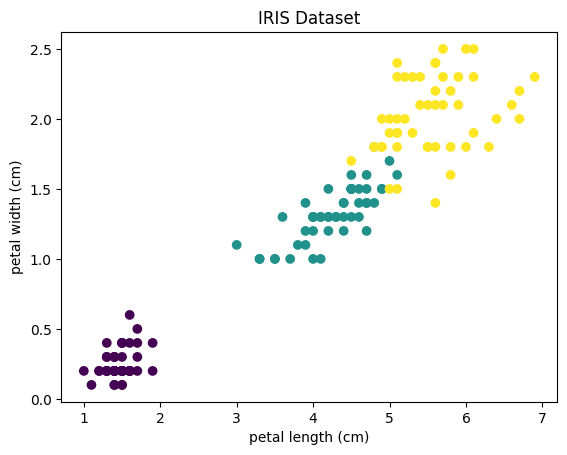

In [3]:
plt.scatter(X[:,0], X[:, 1], c=Y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title("IRIS Dataset")

### Agrupamiento Jerárquico (Complete Linkage)

In [4]:
clusters = hierarchy.linkage(X, method="complete")

clusters[:10]

array([[  0.,   1.,   0.,   2.],
       [  4., 150.,   0.,   3.],
       [  2.,  36.,   0.,   2.],
       [  3.,   7.,   0.,   2.],
       [  8., 151.,   0.,   4.],
       [  6.,  17.,   0.,   2.],
       [ 10., 153.,   0.,   3.],
       [ 28., 154.,   0.,   5.],
       [  9.,  32.,   0.,   2.],
       [ 27., 156.,   0.,   4.]])

Text(0, 0.5, 'Euclidean Distance')

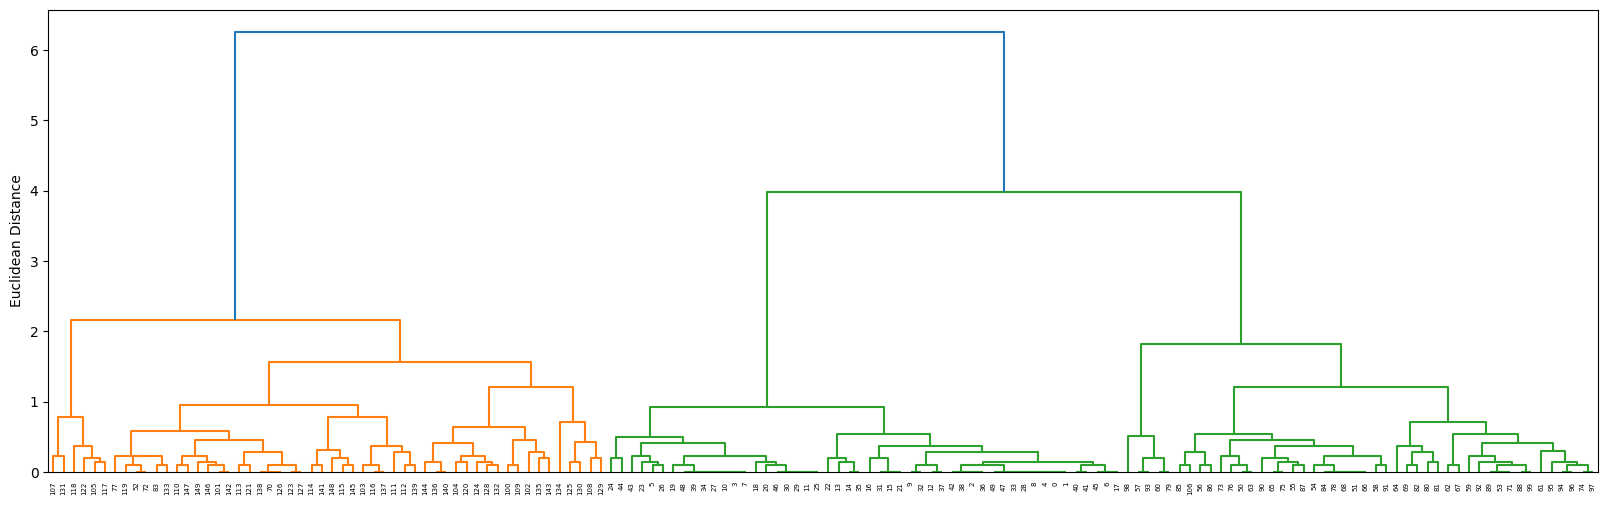

In [5]:
plt.figure(figsize=(20,6))
dendrogram = hierarchy.dendrogram(clusters)
plt.ylabel('Euclidean Distance')

### Agrupamiento Jerárquico (Single Linkage)

In [6]:
clusters = hierarchy.linkage(X, method="single")

clusters[:5]

array([[  0.,   1.,   0.,   2.],
       [  4., 150.,   0.,   3.],
       [  8., 151.,   0.,   4.],
       [ 28., 152.,   0.,   5.],
       [ 33., 153.,   0.,   6.]])

Text(0, 0.5, 'Euclidean Distance')

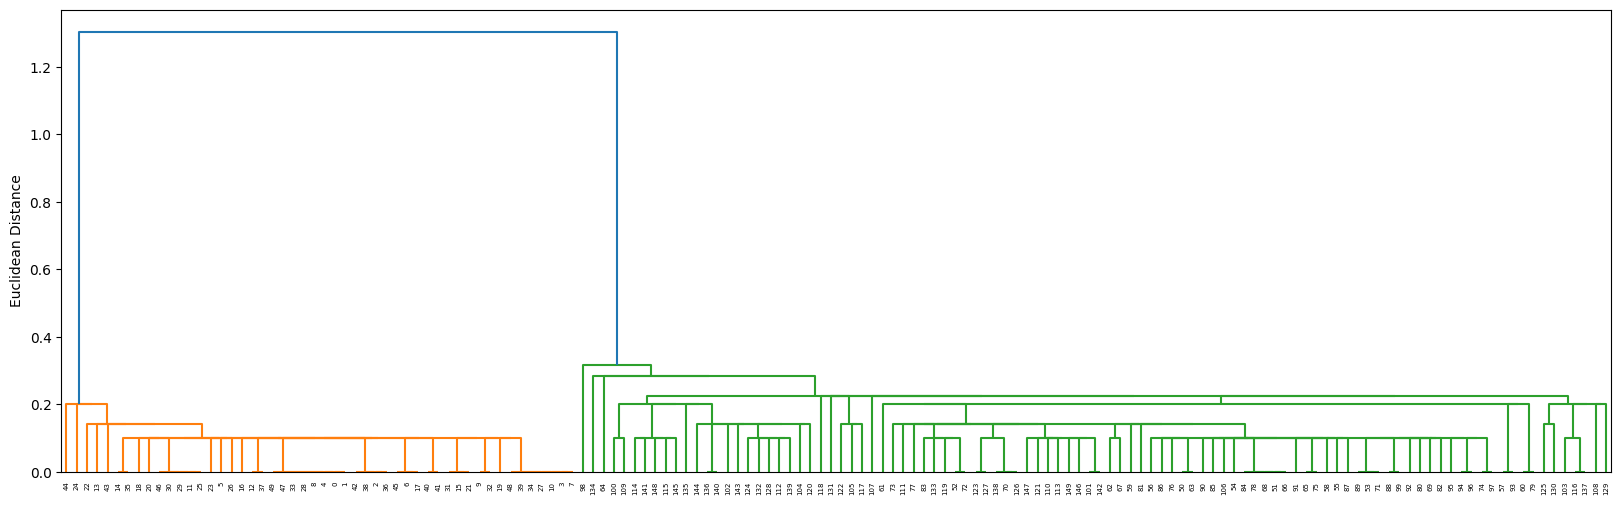

In [7]:
plt.figure(figsize=(20,6))
dendrogram = hierarchy.dendrogram(clusters)
plt.ylabel('Euclidean Distance')

### Agrupamiento Jerárquico (Average Linkage)

In [8]:
clusters = hierarchy.linkage(X, method="average")

clusters[:5]

array([[  0.,   1.,   0.,   2.],
       [  4., 150.,   0.,   3.],
       [  2.,  36.,   0.,   2.],
       [  3.,   7.,   0.,   2.],
       [  8., 151.,   0.,   4.]])

Text(0, 0.5, 'Euclidean Distance')

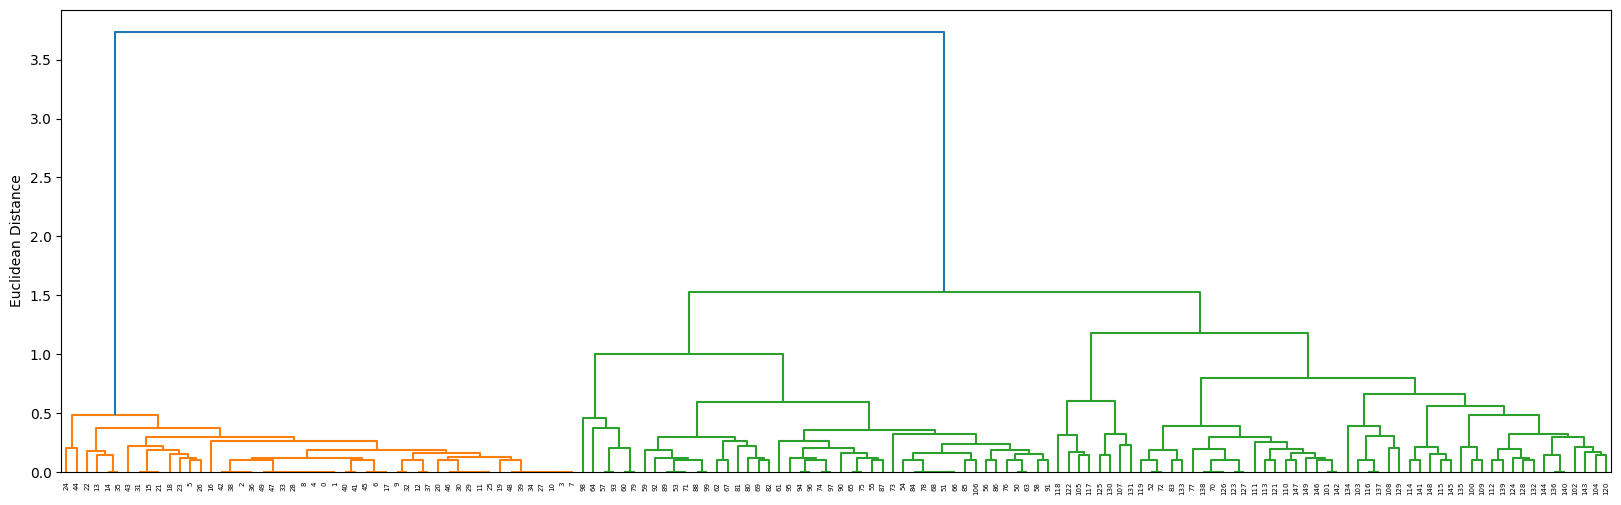

In [9]:
plt.figure(figsize=(20,6))
dendrogram = hierarchy.dendrogram(clusters)
plt.ylabel('Euclidean Distance')

### Agrupamiento Jerárquico (Ward Linkage)

In [10]:
clusters = hierarchy.linkage(X, method="ward")

clusters[:5]

array([[  0.,   1.,   0.,   2.],
       [  4., 150.,   0.,   3.],
       [  2.,  36.,   0.,   2.],
       [  3.,   7.,   0.,   2.],
       [  8., 151.,   0.,   4.]])

Text(0, 0.5, 'Euclidean Distance')

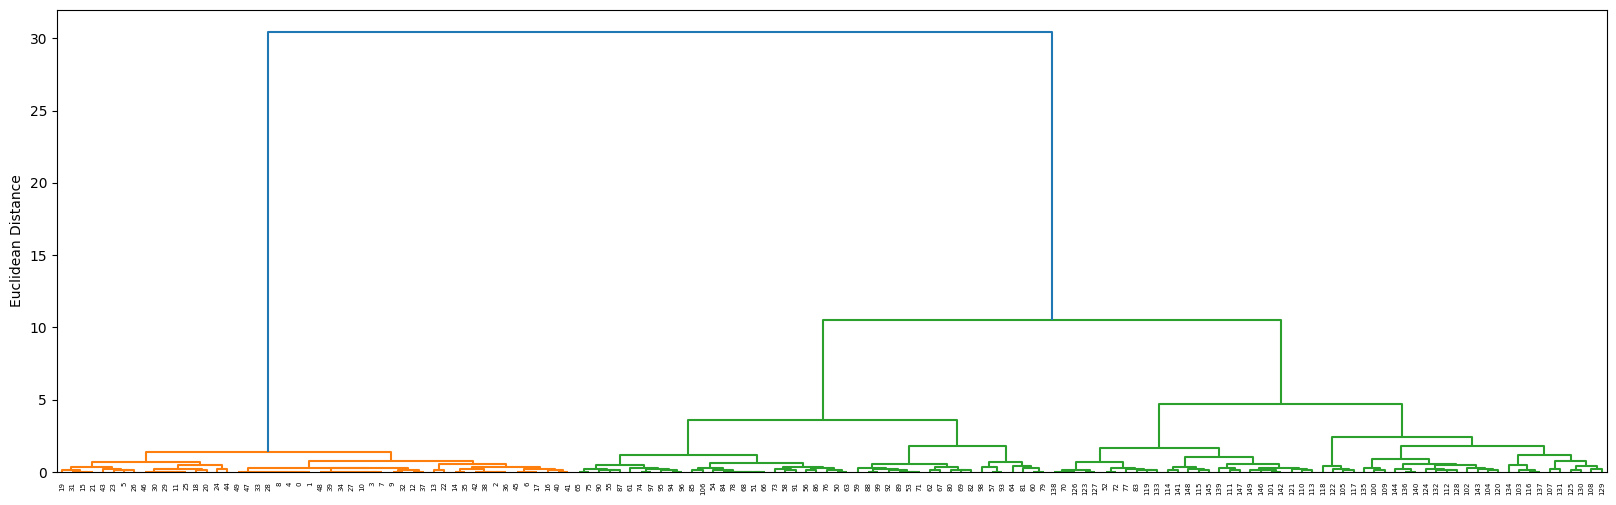

In [11]:
plt.figure(figsize=(20,6))
dendrogram = hierarchy.dendrogram(clusters)
plt.ylabel('Euclidean Distance')

### Modelo Sklearn - Ward

In [12]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward")
Y_preds = clustering.fit_predict(X)

Y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Evaluación Performance

In [13]:
adjusted_rand_score(Y, Y_preds)

0.8857921001989628

### Comparación etiquetas originales VS predicción

Text(0.5, 1.0, 'Clustering Algorithm Prediction')

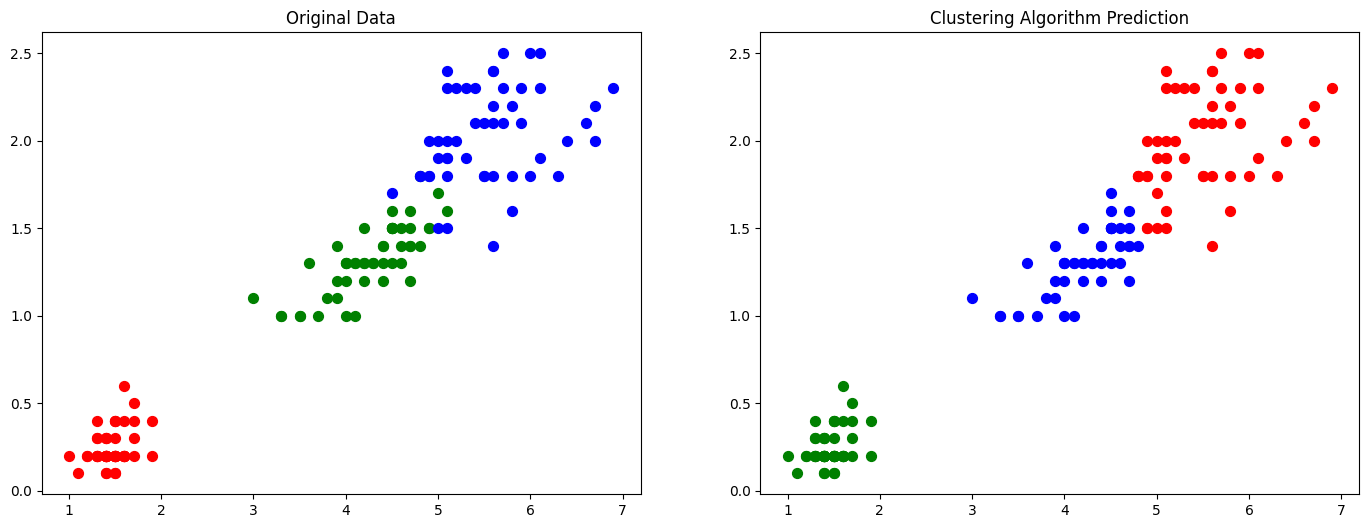

In [14]:
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
plt.scatter(X[Y==0,0],X[Y==0,1], c = 'red', marker="o", s=50)
plt.scatter(X[Y==1,0],X[Y==1,1], c = 'green', marker="o", s=50)
plt.scatter(X[Y==2,0],X[Y==2,1], c = 'blue', marker="o", s=50)
plt.title("Original Data")

plt.subplot(1,2,2)
plt.scatter(X[Y_preds==0,0],X[Y_preds==0,1], c = 'red', marker="o", s=50)
plt.scatter(X[Y_preds==1,0],X[Y_preds==1,1], c = 'green', marker="o", s=50)
plt.scatter(X[Y_preds==2,0],X[Y_preds==2,1], c = 'blue', marker="o", s=50)

plt.title("Clustering Algorithm Prediction")

### Cluster Aglomerativo (Single Linkage)

In [15]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="single")
Y_preds = clustering.fit_predict(X)

Y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Evaluación Performance

In [16]:
adjusted_rand_score(Y, Y_preds)

0.5657466140922338

### Comparación etiquetas originales VS predicción

Text(0.5, 1.0, 'Clustering Algorithm Prediction')

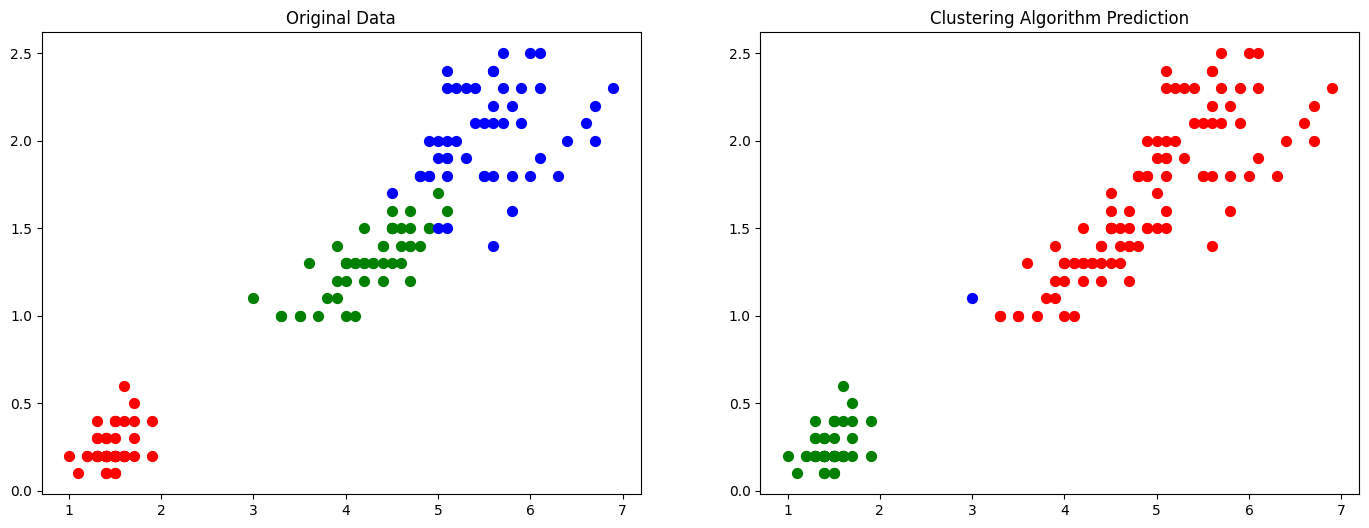

In [17]:
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
plt.scatter(X[Y==0,0],X[Y==0,1], c = 'red', marker="o", s=50)
plt.scatter(X[Y==1,0],X[Y==1,1], c = 'green', marker="o", s=50)
plt.scatter(X[Y==2,0],X[Y==2,1], c = 'blue', marker="o", s=50)
plt.title("Original Data")

plt.subplot(1,2,2)
plt.scatter(X[Y_preds==0,0],X[Y_preds==0,1], c = 'red', marker="o", s=50)
plt.scatter(X[Y_preds==1,0],X[Y_preds==1,1], c = 'green', marker="o", s=50)
plt.scatter(X[Y_preds==2,0],X[Y_preds==2,1], c = 'blue', marker="o", s=50)

plt.title("Clustering Algorithm Prediction")

### Cluster Aglomerativo (Complete Linkage)

In [18]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="complete")
Y_preds = clustering.fit_predict(X)

Y_preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Evaluación Performance

In [19]:
adjusted_rand_score(Y, Y_preds)

0.8857921001989628

### Comparación etiquetas originales VS predicción

Text(0.5, 1.0, 'Clustering Algorithm Prediction')

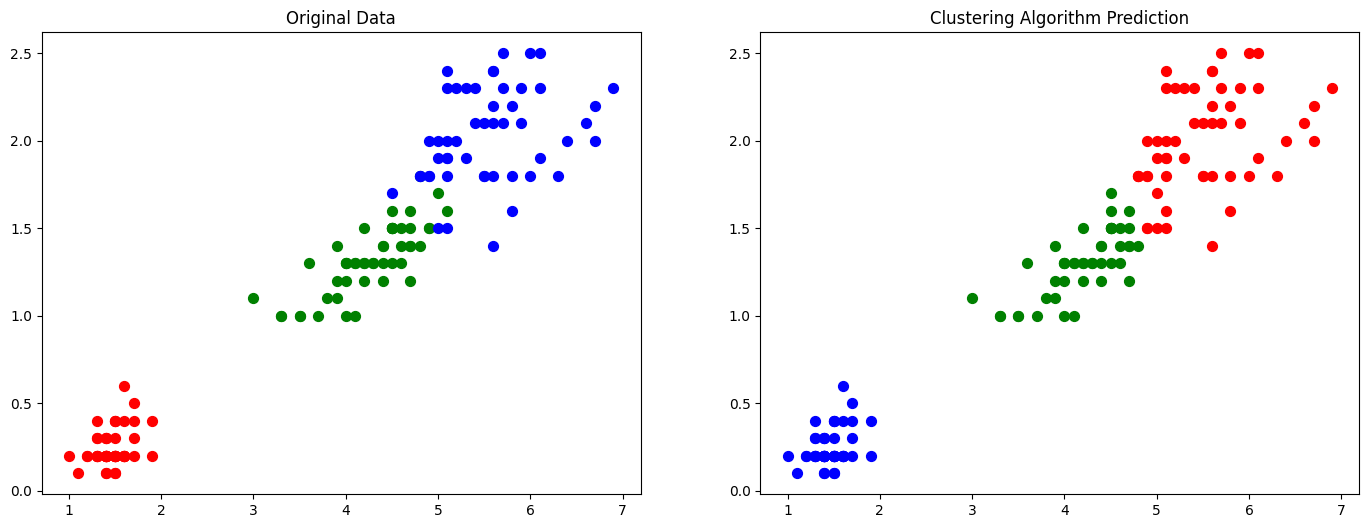

In [20]:
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
plt.scatter(X[Y==0,0],X[Y==0,1], c = 'red', marker="o", s=50)
plt.scatter(X[Y==1,0],X[Y==1,1], c = 'green', marker="o", s=50)
plt.scatter(X[Y==2,0],X[Y==2,1], c = 'blue', marker="o", s=50)
plt.title("Original Data")

plt.subplot(1,2,2)
plt.scatter(X[Y_preds==0,0],X[Y_preds==0,1], c = 'red', marker="o", s=50)
plt.scatter(X[Y_preds==1,0],X[Y_preds==1,1], c = 'green', marker="o", s=50)
plt.scatter(X[Y_preds==2,0],X[Y_preds==2,1], c = 'blue', marker="o", s=50)

plt.title("Clustering Algorithm Prediction")

### Cluster Aglomerativo (Average Linkage)

In [21]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="average")
Y_preds = clustering.fit_predict(X)

Y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Evaluación Performance

In [22]:
adjusted_rand_score(Y, Y_preds)

0.8857921001989628

### Comparación etiquetas originales VS predicción

Text(0.5, 1.0, 'Clustering Algorithm Prediction')

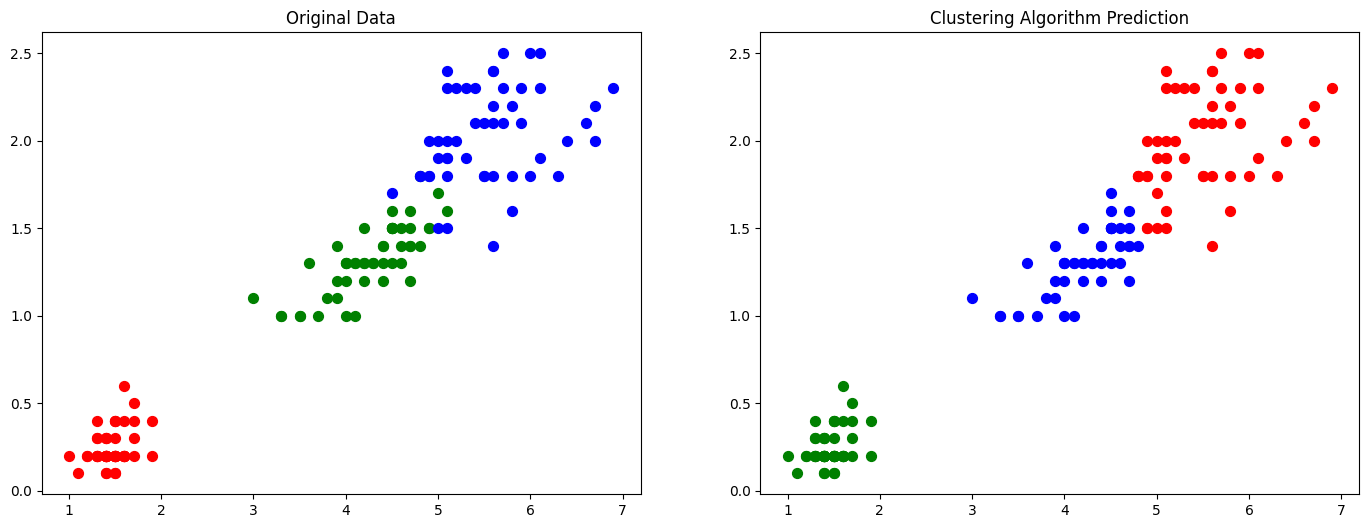

In [23]:
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
plt.scatter(X[Y==0,0],X[Y==0,1], c = 'red', marker="o", s=50)
plt.scatter(X[Y==1,0],X[Y==1,1], c = 'green', marker="o", s=50)
plt.scatter(X[Y==2,0],X[Y==2,1], c = 'blue', marker="o", s=50)
plt.title("Original Data")

plt.subplot(1,2,2)
plt.scatter(X[Y_preds==0,0],X[Y_preds==0,1], c = 'red', marker="o", s=50)
plt.scatter(X[Y_preds==1,0],X[Y_preds==1,1], c = 'green', marker="o", s=50)
plt.scatter(X[Y_preds==2,0],X[Y_preds==2,1], c = 'blue', marker="o", s=50)

plt.title("Clustering Algorithm Prediction")

### Evaluación de la mejor predicción

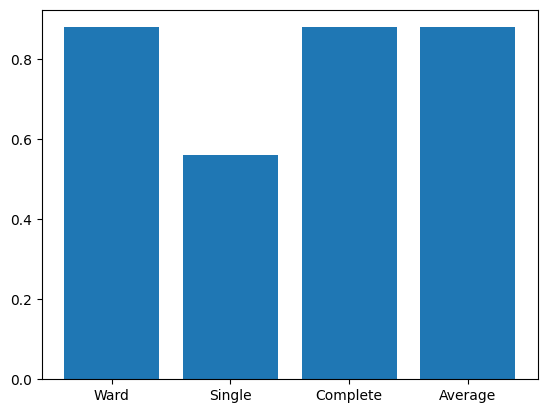

In [24]:
x = ['Ward','Single','Complete','Average']
y = [0.88, 0.56, 0.88, 0.88]
plt.bar(x, y)
plt.show()